# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts you have learned so far, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with interactions and polynomial features 
- Use AIC and BIC to select the best value for the regularization parameter 


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale

from sklearn.datasets import load_boston

## Look at a baseline boston housing data model

- Import the Boston housing dataset 
- Split the data into target (`y`) and predictors (`X`) -- ensure these both are DataFrames 
- Scale all the predictors using `scale`. Convert these scaled features into a DataFrame 
- Build at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation (set `random_state` to 1) and use the $R^2$ score to evaluate the model 

In [2]:
# Your code here
boston = load_boston()

In [3]:
# Set up DataFrames
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target,  columns=['target'])

Check variables for normality & Heterosedisity 

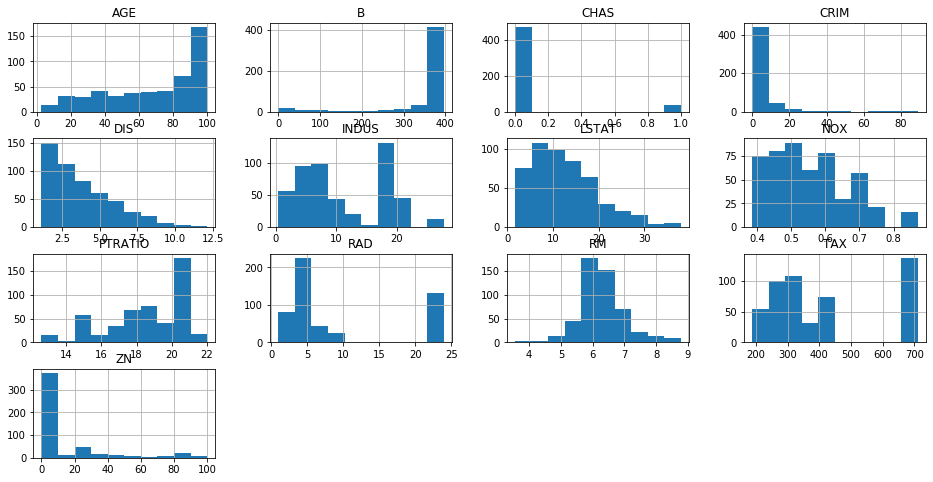

In [5]:
X.hist(figsize=(16,8))
plt.show()

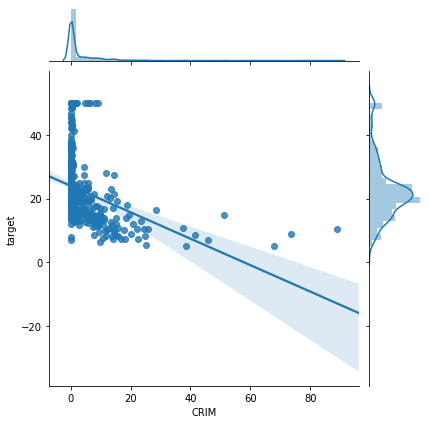

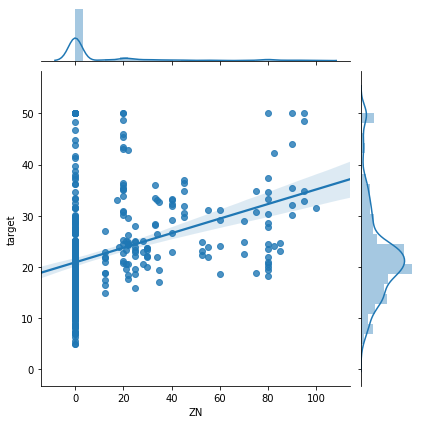

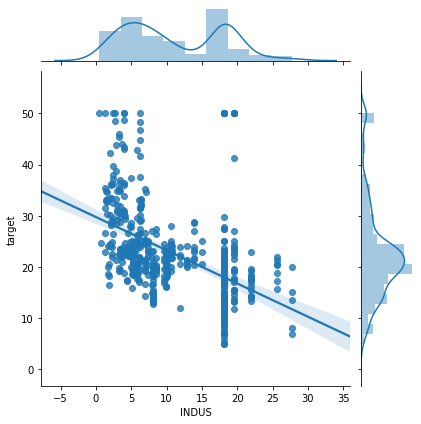

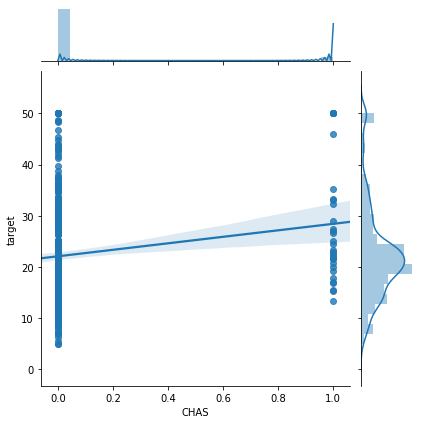

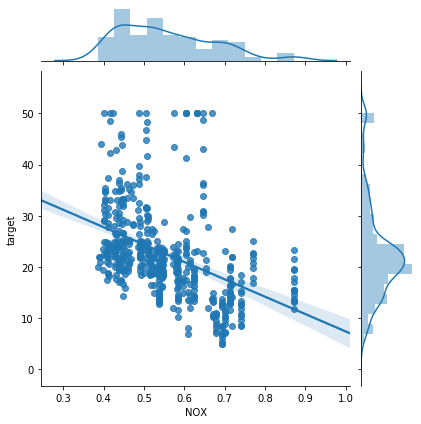

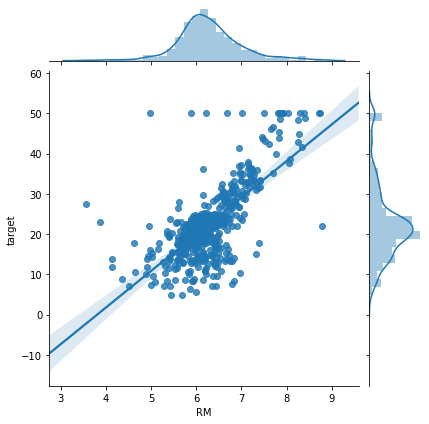

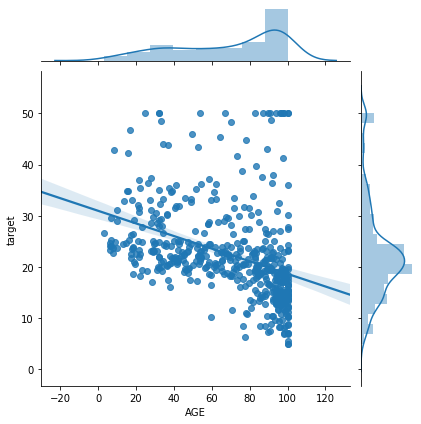

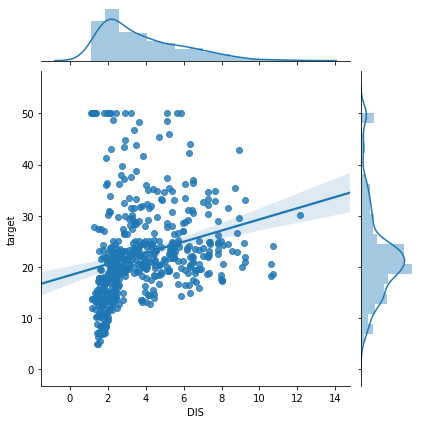

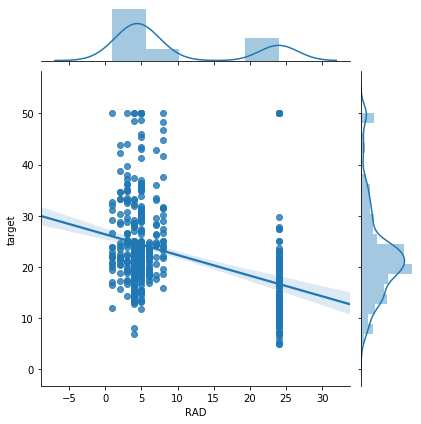

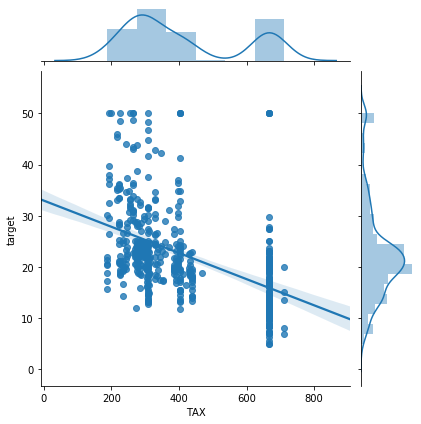

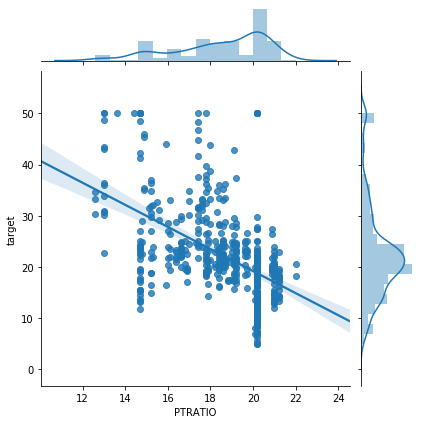

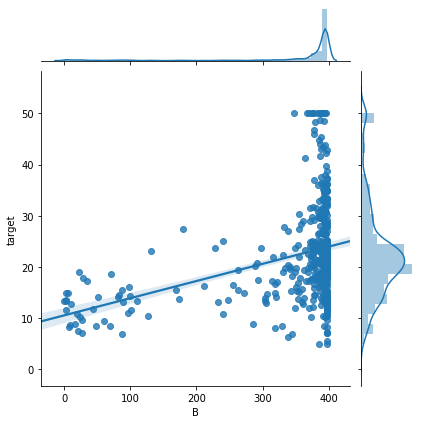

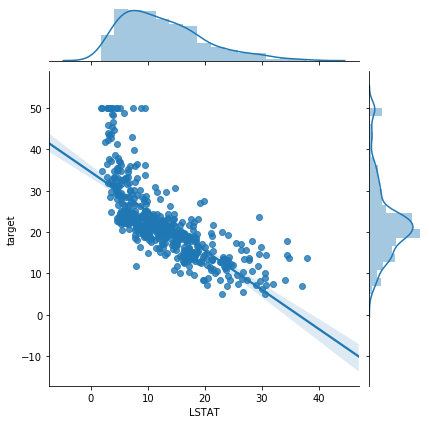

In [25]:
cols = list(X.columns)
for col in cols:
    sns.jointplot(X[col], y['target'], kind='reg')

In [7]:
# Sacle the predictors
X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [8]:
# Concat to DF
all_data = pd.concat([y,X_scaled], axis = 1)
all_data.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [11]:
#Answers
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_scaled, y, scoring='r2', cv=crossvalidation))
baseline

0.7176778617934925

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold cross-validation and store the $R^2$ to compare it with the baseline model.

Print the 7 most important interactions.

In [12]:
# Your code here
def feature_combinations_r_sqrd_with_Inter_df(X, y, k_splt=10, num_feat_comb=2):
    # Imports
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from itertools import combinations
    
    # Create Regression & Combinations
    regression = LinearRegression()
    combinations = list(combinations(list(X.columns), num_feat_comb))
    
    # Create cross-validation & output a bassline MSE score 
    crossvalidation = KFold(n_splits=k_splt, shuffle=True, random_state=1)
    baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
    print("Baseline:", round(baseline, 3))
    
    # Create cross-validation & output a bassline MSE score as a DataFrame
    comb_scores = []
    inter_cols = []
    inter_score = []
    data = X.copy()
    
    for comb in combinations:
        data['interaction'] = data[comb[0]] * data[comb[1]]
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: 
            comb_scores.append(round(score,3))
            inter_cols.append((str(comb[0]) + '_' + str(comb[1])))
            inter_score.append(data[comb[0]] * data[comb[1]])
    
    df_base = pd.DataFrame(data=[inter_cols, comb_scores])
    df_base = df_base.T  
    df_base.rename(columns={0: "Interaction", 1: "CV_score"}, inplace=True)
    df_base.sort_values(by='CV_score', inplace = True, ascending=False )
    df_base.reset_index(drop=True, inplace = True)
    
    df_interactions_scores = pd.DataFrame(data=inter_score , index=inter_cols)
    df_interactions_scores = df_interactions_scores.T
    

    return df_base , df_interactions_scores

In [16]:
df_inter, df_score = feature_combinations_r_sqrd_with_Inter_df(X_scaled, y, k_splt=5, num_feat_comb=2)
df_inter.head(7)

Baseline: 0.718


,Interaction,CV_score
0,RM_LSTAT,0.783
1,RM_TAX,0.775
2,RM_RAD,0.77
3,RM_PTRATIO,0.764
4,INDUS_RM,0.757
5,NOX_RM,0.746
6,RM_AGE,0.742


In [14]:
df_score.head()

,CRIM_CHAS,CRIM_NOX,CRIM_AGE,CRIM_DIS,CRIM_RAD,CRIM_TAX,CRIM_PTRATIO,CRIM_LSTAT,ZN_INDUS,ZN_RM,...,RM_LSTAT,AGE_DIS,AGE_TAX,AGE_PTRATIO,AGE_B,DIS_RAD,DIS_TAX,DIS_PTRATIO,TAX_PTRATIO,B_LSTAT
0,0.114432,0.060540,0.050379,-0.058859,0.412580,0.279830,0.612462,0.451502,-0.366835,0.117826,...,-0.444930,-0.016828,0.080002,0.175100,-0.052932,-0.137808,-0.093468,-0.204572,0.972582,-0.474379
1,0.113766,0.308940,-0.153233,-0.232525,0.362201,0.412051,0.126493,0.205514,0.289405,-0.094752,...,-0.095668,0.204570,-0.362514,-0.111286,0.161939,-0.483549,-0.550100,-0.168872,0.299254,-0.217191
2,0.113767,0.308942,0.110934,-0.232526,0.362203,0.412054,0.126494,0.504452,0.289405,-0.625608,...,-1.550451,-0.148100,0.262444,0.080566,-0.105375,-0.483549,-0.550100,-0.168872,0.299254,-0.479172
3,0.113606,0.348105,0.337521,-0.449147,0.313781,0.460974,-0.047106,0.567413,0.637393,-0.495673,...,-1.383713,-0.872847,0.895830,-0.091543,-0.337046,-0.811452,-1.192101,0.121819,-0.125027,-0.566613
4,0.112442,0.344539,0.210852,-0.444547,0.310567,0.456252,-0.046624,0.423413,0.637393,-0.599204,...,-1.261136,-0.550917,0.565424,-0.057780,-0.225457,-0.811452,-1.192101,0.121819,-0.125027,-0.452740


Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [20]:
# Your code here
def add_interaction_feature(data, df_inter, df_score, num_inter):
    i=0
    
    while i < num_inter:
        col = df_inter['Interaction'][i]
  
        data[col] = df_score[col]
        i+=1
    
    return data

In [21]:
data_combined = add_interaction_feature(all_data, df_inter, df_score, 7)
data_combined.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,...,PTRATIO,B,LSTAT,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE
0,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,...,-1.459000,0.441052,-1.075562,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646
1,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,...,-0.303094,0.441052,-0.492439,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331
2,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,...,-0.303094,0.396427,-1.208727,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960
3,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,...,0.113032,0.416163,-1.361517,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092
4,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,...,0.113032,0.441052,-1.026501,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023


In [22]:
# answers
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

interactions = []
data = X_scaled.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

df_inter = X_scaled.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
for inter in ls_interactions:
    df_inter[inter[0] + '_' + inter[1]] = X[inter[0]] * X[inter[1]]

Top 7 interactions: [('RM', 'LSTAT', 0.783), ('RM', 'TAX', 0.775), ('RM', 'RAD', 0.77), ('RM', 'PTRATIO', 0.764), ('INDUS', 'RM', 0.757), ('NOX', 'RM', 0.746), ('RM', 'AGE', 0.742)]


## Include polynomials

Try polynomials of degrees 2, 3, and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)` 

In [26]:
# Your code here - From Answers
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

polynomials = []
for col in X.columns:
    for degree in [2, 3, 4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score, 3)))
print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

Top 10 polynomials: [('RM', 4, 0.806), ('RM', 2, 0.788), ('RM', 3, 0.787), ('LSTAT', 4, 0.777), ('LSTAT', 3, 0.771), ('LSTAT', 2, 0.77), ('DIS', 3, 0.735), ('DIS', 4, 0.733), ('DIS', 2, 0.731), ('TAX', 4, 0.727)]


For each variable, print out the maximum R2 possible when including Polynomials.

In [27]:
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()

0
CRIM       0.719
ZN         0.723
INDUS      0.726
CHAS       0.719
NOX        0.722
RM         0.806
AGE        0.722
DIS        0.735
RAD        0.722
TAX        0.727
PTRATIO    0.723
B          0.722
LSTAT      0.777
Name: 2, dtype: float64

Which two variables seem to benefit most from adding polynomial terms?

In [28]:
# feat  |  degree    |   R^2
# RM    |    4       |  0.806
# LSTAT |    4       |  0.777

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two features, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [29]:
# Your code here - Answers
for col in ['RM', 'LSTAT']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_transformed = poly.fit_transform(X[[col]])
    colnames= [col, col + '_' + '2',  col + '_' + '3', col + '_' + '4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_transformed, columns=colnames)], axis=1)

Check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

In [30]:
# Your code here
df_inter.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,NOX_RM,RM_AGE,RM,RM_2,RM_3,RM_4,LSTAT,LSTAT_2,LSTAT_3,LSTAT_4
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,3.537350,428.6900,6.575,43.230625,284.241359,1868.886938,4.98,24.8004,123.505992,615.059840
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,3.011449,506.6169,6.421,41.229241,264.732956,1699.850313,9.14,83.5396,763.551944,6978.864768
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,3.369765,439.0035,7.185,51.624225,370.920057,2665.060607,4.03,16.2409,65.450827,263.766833
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,3.205084,320.5084,6.998,48.972004,342.706084,2398.257176,2.94,8.6436,25.412184,74.711821
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,3.273326,387.3674,7.147,51.079609,365.065966,2609.126456,5.33,28.4089,151.419437,807.065599


## Full model R-squared

Check out the R-squared of the full model.

In [31]:
# Your code here - Answers
full_model = np.mean(cross_val_score(regression, df_inter, y, scoring='r2', cv=crossvalidation))
print("Full model R^2:", full_model)

Full model R^2: 0.8068370464241061


In [32]:
# Checking using Statsmodel
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter)
model = sm.OLS(y, df_inter_sm)
resutls = model.fit()

resutls.summary()

# The Results are good, however;
# P values for some predictors are very high  = could remove high value preds.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 13 Jan 2020   Prob (F-statistic):          1.14e-175
Time:                        09:50:35   Log-Likelihood:                -1368.2
No. Observations:                 506   AIC:                             2790.
Df Residuals:                     479   BIC:                             2904.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -725.5415    156.666     -4.631      0.000   -1033.379    -417.704
CRIM          -1.4057      0.226     -6.230      0.000      -1.849      -0.962
ZN            -0.0806      0.278     -0.290      0.772      -0.628       0.466
INDUS          0.6367      3.793      0.168      0.867      -6.816       8.089
CHAS           0.6283      0.176      3.573      0.000       0.283       0.974
NOX           -0.0137      3.234     -0.004      0.997      -6.369       6.342
AGE            2.1795      2.742      0.795      0.427      -3.208       7.568
DIS           -1.6461      0.345     -4.770      0.000      -2.324      -0.968
RAD            3.8544      4.697      0.821      0.412      -5.375      13.084
TAX           -0.7798      5.479     -0.142      0.887     -11.546       9.986
PTRATIO        5.4135      2.278      2.377      0.018       0.938       9.889
B              0.6370      0.199      3.204      0.001       0.246       1.028
RM_LSTAT       0.1665      0.074      2.257      0.024       0.022       0.311
RM_TAX        -0.0011      0.005     -0.200      0.842      -0.011       0.009
RM_RAD        -0.0305      0.088     -0.346      0.729      -0.204       0.143
RM_PTRATIO    -0.4999      0.165     -3.026      0.003      -0.825      -0.175
INDUS_RM      -0.0008      0.089     -0.009      0.993      -0.175       0.173
NOX_RM        -2.2632      4.592     -0.493      0.622     -11.287       6.760
RM_AGE        -0.0112      0.015     -0.724      0.470      -0.042       0.019
RM           550.5382    107.557      5.119      0.000     339.196     761.881
RM_2        -136.6000     27.195     -5.023      0.000    -190.036     -83.164
RM_3          14.8708      2.950      5.041      0.000       9.074      20.668
RM_4          -0.5875      0.117     -5.006      0.000      -0.818      -0.357
LSTAT         -4.3563      0.879     -4.959      0.000      -6.083      -2.630
LSTAT_2        0.2283      0.063      3.619      0.000       0.104       0.352
LSTAT_3       -0.0080      0.002     -3.285      0.001      -0.013      -0.003
LSTAT_4        0.0001   3.27e-05      3.195      0.001    4.03e-05       0.000
==============================================================================
Omnibus:                      265.759   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3336.056
Skew:                           1.986   Prob(JB):                         0.00
Kurtosis:                      14.936   Cond. No.                     2.96e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
""

## Find the best Lasso regularization parameter

You learned that when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter $alpha$ of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

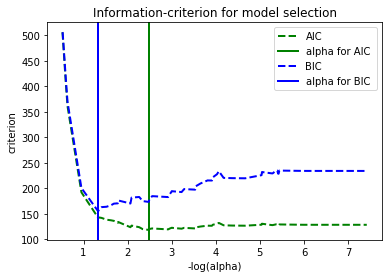

In [35]:
# Your code here - answers
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(df_inter, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(df_inter, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'green')
plot_ic_criterion(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');


## Analyze the final result

Finally, use the best value for the regularization parameter according to AIC and BIC, and compare R-squared and MSE using train-test split. Compare with the baseline model.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [ ]:
# Split X_scaled and y into training and test sets
# Set random_state to 1
X_train, X_test, y_train, y_test = None

# Code for baseline model
linreg_all = None


# Print R2 and MSE


In [ ]:
# Split df_inter and y into training and test sets
# Set random_state to 1
X_train, X_test, y_train, y_test = None

# Code for lasso with alpha from AIC
lasso = None


# Print R2 and MSE


In [ ]:
# Code for lasso with alpha from BIC
lasso = None


# Print R2 and MSE


## Level up (Optional)

### Create a Lasso path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-learn there is a function `lasso_path()` which visualizes the shrinkage of the coefficients while $alpha$ changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 